# Improvement in classification, based on feature selection
Using the information about the top
correlating features obtained in item (4), transform the full data set **`train_smpl`** so as to keep the
following attributes:
* Using only the top 5 pixels from each **`train_smpl_\<label>`**.
* Using only the top 10 pixels from each **`train_smpl_\<label>`**.
* Using only the top 20 pixels from each **`train_smpl_\<label>`**.
* You will have three data sets, with approximately 50, 100 and 200 features (pixels) each.
Repeat the experiment described in item (3) on these three data sets.

In [1]:
import numpy as np

In [2]:
from Scripts import pixelFinder as pf 
from Scripts.NaiveBayse import NaiveBayseGaussian as nbg
from Scripts import helperfn as hf
from Scripts import plotScripts as ps
%load_ext autoreload
%autoreload 2


In [3]:
def get_top_pixels(n):
    pixel_order = []
    for i in range(-1, 10):
        pixel_order.append(np.array(pf.bestPixels(i, n)))
    return pixel_order

def grab_n_pixels(pixel_order, n):
    output = []

    # j is the pixel order list
    for j in range(len(pixel_order)):
        output.append(pixel_order[j][:n]) 

    return output


def data_lists():
    data = []
    for i in range(-1, 10):
        data.append(helperfn.get_data(i))
    return data

def build_classifiers(data, pixel_order, y_labels, balance_classes=False):
    classifiers = []
    scores = []
    dataset = []
    for i in range(0, 11):
        X = np.take(data, pixel_order[i], axis=1)
        y = y_labels[i]
        classifier, score, local_data = nbg.nbg_model_custom_data(X, y, data_label=i-1, balance_classes=balance_classes)
        classifiers += [classifier]
        scores += [score]
        dataset += [local_data]

    return classifiers, scores, dataset

In [4]:
pixel_order = get_top_pixels(2304)

In [5]:
labels = []
for i in range(-1, 10):
    labels.append(hf.get_results(i))

In [6]:
x_data = hf.get_data_noresults()

In [7]:
pixels = []

pixels = grab_n_pixels(pixel_order, 5)

In [8]:
print(len(pixels))
print((x_data.shape))

11
(9690, 2304)


In [9]:


bal_classifers, bal_scores, bal_data = build_classifiers(x_data, pixels, labels, balance_classes=True)



    




Scores for dataset:  All Classes
Training data score:  0.2226190476190476
Testing data score:  0.19285714285714287
--------------------------------------
Scores for dataset:  speed limit 20
Training data score:  0.6011904761904762
Testing data score:  0.6190476190476191
--------------------------------------
Scores for dataset:  speed limit 30
Training data score:  0.5523648648648649
Testing data score:  0.5484234234234234
--------------------------------------
Scores for dataset:  speed limit 50
Training data score:  0.5727777777777778
Testing data score:  0.5555555555555556
--------------------------------------
Scores for dataset:  speed limit 60
Training data score:  0.7743794326241135
Testing data score:  0.8209219858156028
--------------------------------------
Scores for dataset:  speed limit 70
Training data score:  0.59375
Testing data score:  0.6035353535353535
--------------------------------------
Scores for dataset:  left turn
Training data score:  0.6607142857142857
Testi

In [10]:
print(bal_scores[0])



(0.2226190476190476, 0.19285714285714287)


In [11]:
from IPython.utils import io
from datetime import datetime
bal_scores_list = []


for i in range(1,2304):
    pixels = grab_n_pixels(pixel_order, i)
    print(i)
    with io.capture_output() as captured:
        bal_classifers, bal_scores, bal_data = build_classifiers(x_data, pixels, labels, balance_classes=True)
    bal_scores_list.append(bal_scores)

print(datetime.now())


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [42]:
print(bal_scores_list[0])
train_scores , test_scores = ps.unzip_scores(bal_scores_list[0])



#ps.unzip_scores(bal_scores_list[0][0])

[(0.21904761904761905, 0.22380952380952382), (0.5892857142857143, 0.5833333333333334), (0.5526463963963963, 0.5484234234234234), (0.55, 0.5377777777777778), (0.7575354609929078, 0.8014184397163121), (0.6133207070707071, 0.6098484848484849), (0.6369047619047619, 0.6785714285714286), (0.7934027777777778, 0.8125), (0.6953125, 0.7291666666666666), (0.6226851851851852, 0.6018518518518519), (0.7152777777777778, 0.6388888888888888)]


In [13]:
train_scores

array([0.21904762, 0.58928571, 0.5526464 , 0.55      , 0.75753546,
       0.61332071, 0.63690476, 0.79340278, 0.6953125 , 0.62268519,
       0.71527778])

In [14]:
test_scores

array([0.22380952, 0.58333333, 0.54842342, 0.53777778, 0.80141844,
       0.60984848, 0.67857143, 0.8125    , 0.72916667, 0.60185185,
       0.63888889])

In [43]:
#ps.unzip_scores(unbal_scores) == bal_scores_list[0][0]
#

train_scores = []
test_scores = []

# loops over pixels
for i in range(len(bal_scores_list)):
    train, test = ps.unzip_scores(bal_scores_list[i])
    train_scores.append(train)
    test_scores.append(test)








In [44]:
np_train_scores = np.array(train_scores)

np_train_scores[:,0]

array([0.21904762, 0.20952381, 0.20892857, ..., 0.3452381 , 0.34583333,
       0.34583333])

In [45]:
np_test_scores = np.array(test_scores)

In [46]:
# The X axis will be the number of pixels in the classifier 
# The Y axis will be the accuarcy of the classifier 
# The colour of the line denotes individual classes 



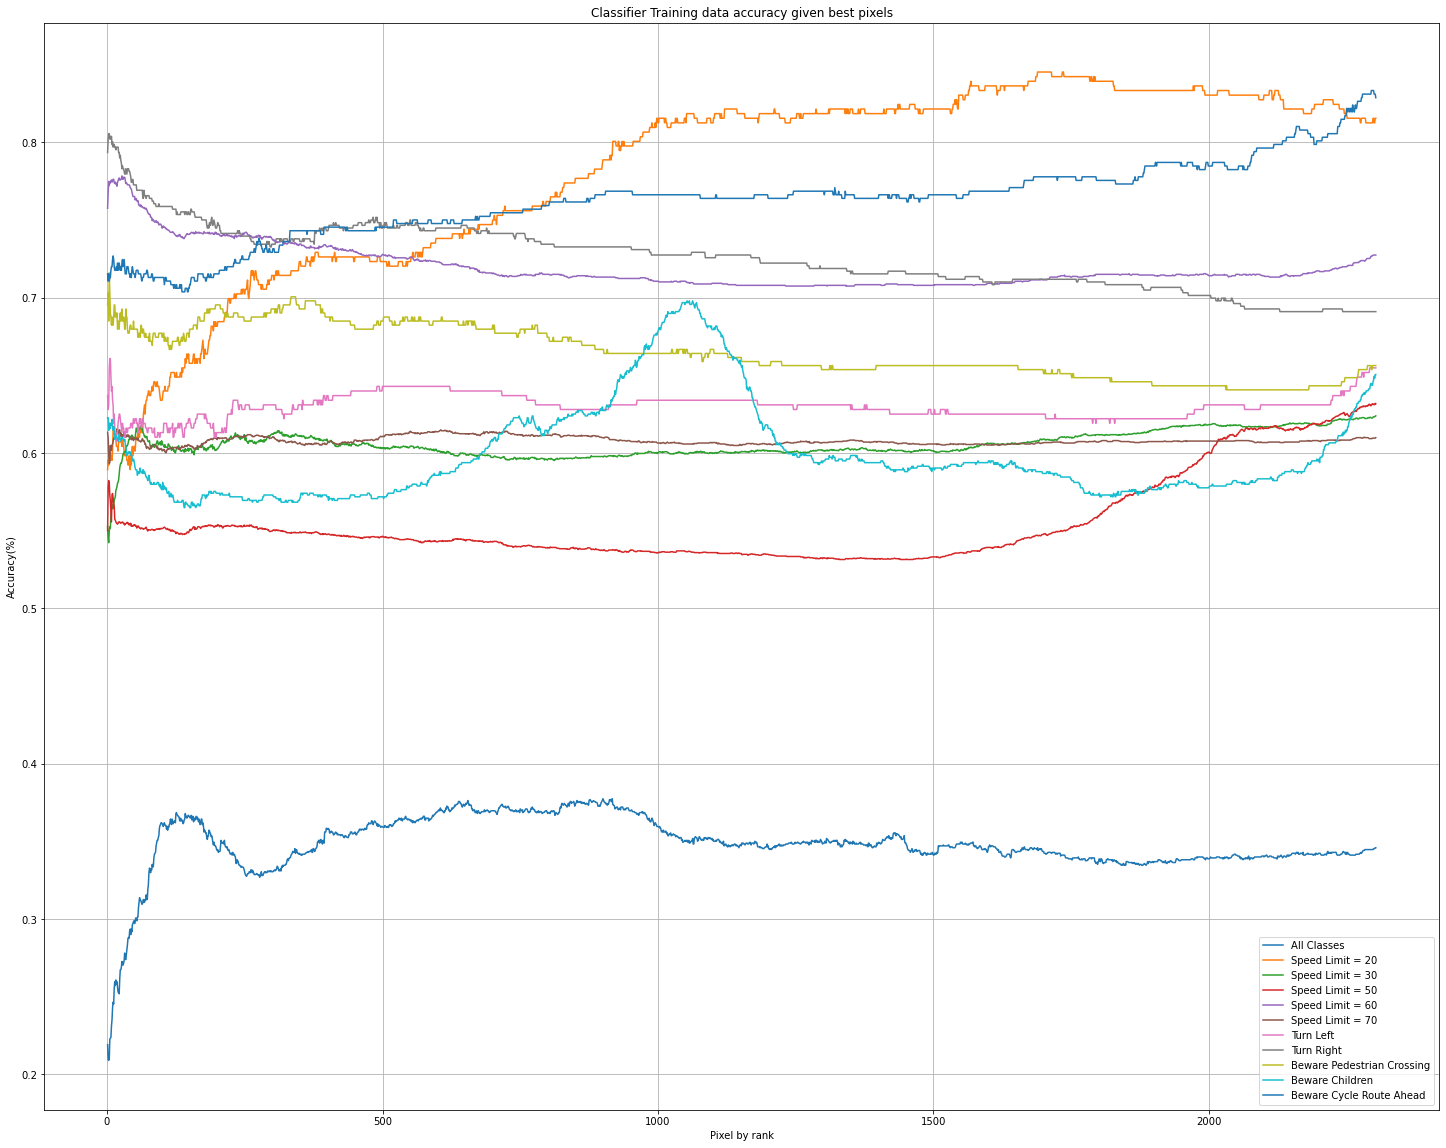

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# Data for plotting
# T x axis
t = [i for i in range(1,2304)]
# S y axis
s = np_train_scores[:,0]
a = np_train_scores[:,1]
b = np_train_scores[:,2]
c = np_train_scores[:,3]
d = np_train_scores[:,4]
e = np_train_scores[:,5]
f = np_train_scores[:,6]
g = np_train_scores[:,7]
h = np_train_scores[:,8]
i = np_train_scores[:,9]
j = np_train_scores[:,10]




fig, ax = plt.subplots(figsize=(25, 20))
ax.plot(t, s, label='All Classes')
ax.plot(t, a, label='Speed Limit = 20')
ax.plot(t, b, label='Speed Limit = 30')
ax.plot(t, c, label='Speed Limit = 50')
ax.plot(t, d, label='Speed Limit = 60')
ax.plot(t, e, label='Speed Limit = 70')
ax.plot(t, f, label='Turn Left')
ax.plot(t, g, label='Turn Right')
ax.plot(t, h, label='Beware Pedestrian Crossing')
ax.plot(t, i, label='Beware Children')
ax.plot(t, j, label='Beware Cycle Route Ahead')
ax.legend()


ax.set(xlabel='Pixel by rank', ylabel='Accuracy(%)',
       title='Classifier Training data accuracy given best pixels')
ax.grid()


fig.savefig("train_2304_pixels.png")
plt.show()

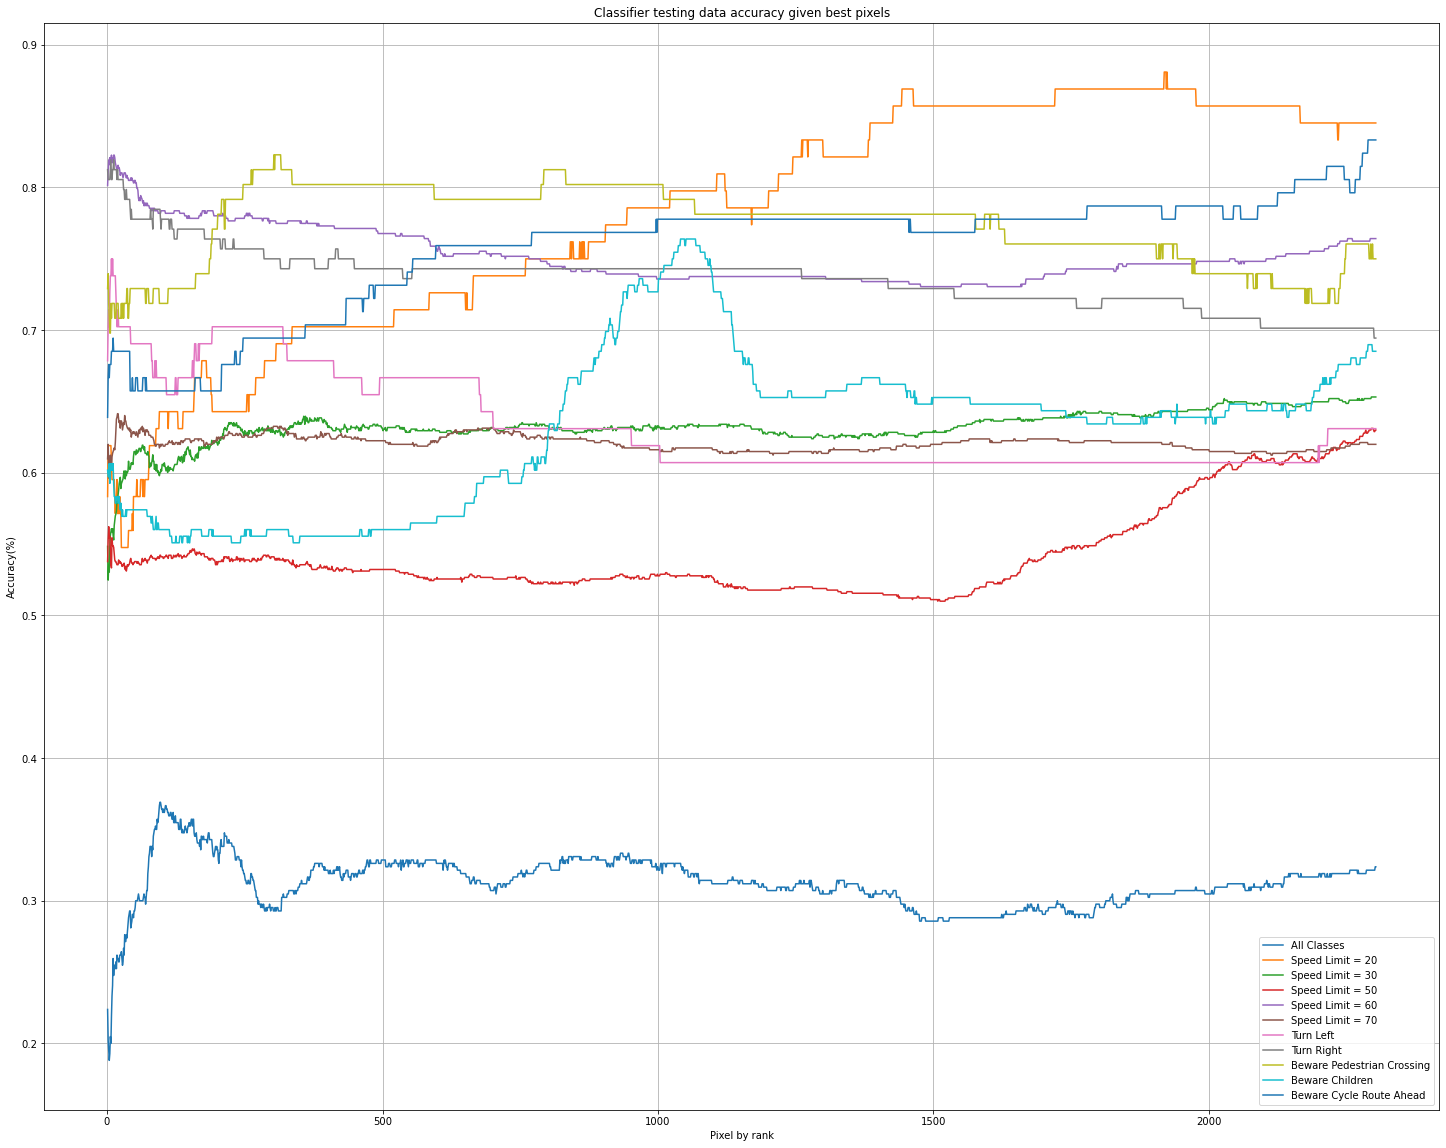

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


# Data for plotting
# T x axis
t = [i for i in range(1,2304)]
# S y axis
s = np_test_scores[:,0]
a = np_test_scores[:,1]
b = np_test_scores[:,2]
c = np_test_scores[:,3]
d = np_test_scores[:,4]
e = np_test_scores[:,5]
f = np_test_scores[:,6]
g = np_test_scores[:,7]
h = np_test_scores[:,8]
i = np_test_scores[:,9]
j = np_test_scores[:,10]




fig, ax = plt.subplots(figsize=(25, 20))
ax.plot(t, s, label='All Classes')
ax.plot(t, a, label='Speed Limit = 20')
ax.plot(t, b, label='Speed Limit = 30')
ax.plot(t, c, label='Speed Limit = 50')
ax.plot(t, d, label='Speed Limit = 60')
ax.plot(t, e, label='Speed Limit = 70')
ax.plot(t, f, label='Turn Left')
ax.plot(t, g, label='Turn Right')
ax.plot(t, h, label='Beware Pedestrian Crossing')
ax.plot(t, i, label='Beware Children')
ax.plot(t, j, label='Beware Cycle Route Ahead')
ax.legend()


ax.set(xlabel='Pixel by rank', ylabel='Accuracy(%)',
       title='Classifier testing data accuracy given best pixels')
ax.grid()


fig.savefig("test_2304_pixels.png")
plt.show()